# Дисклеймер
Это не оформление в Юпитере!
Это питоновский код, запущенный в 1 строчку юпитера, потому что в VS Code анимация показывает несколько кадров анимации, а потом зависает, в то время как юпитер это запускает
Однако на Юпитер переписывать не хочу, потому юпитер не подставляет сам названия функций длиной в полсухотные границы России, там нет отладки кода, и в общежитии беды с интернетом, из-за чего ядро от***ывает стабильно раз в 15 минут, хотя остальные страницы работают

<IPython.core.display.Javascript object>


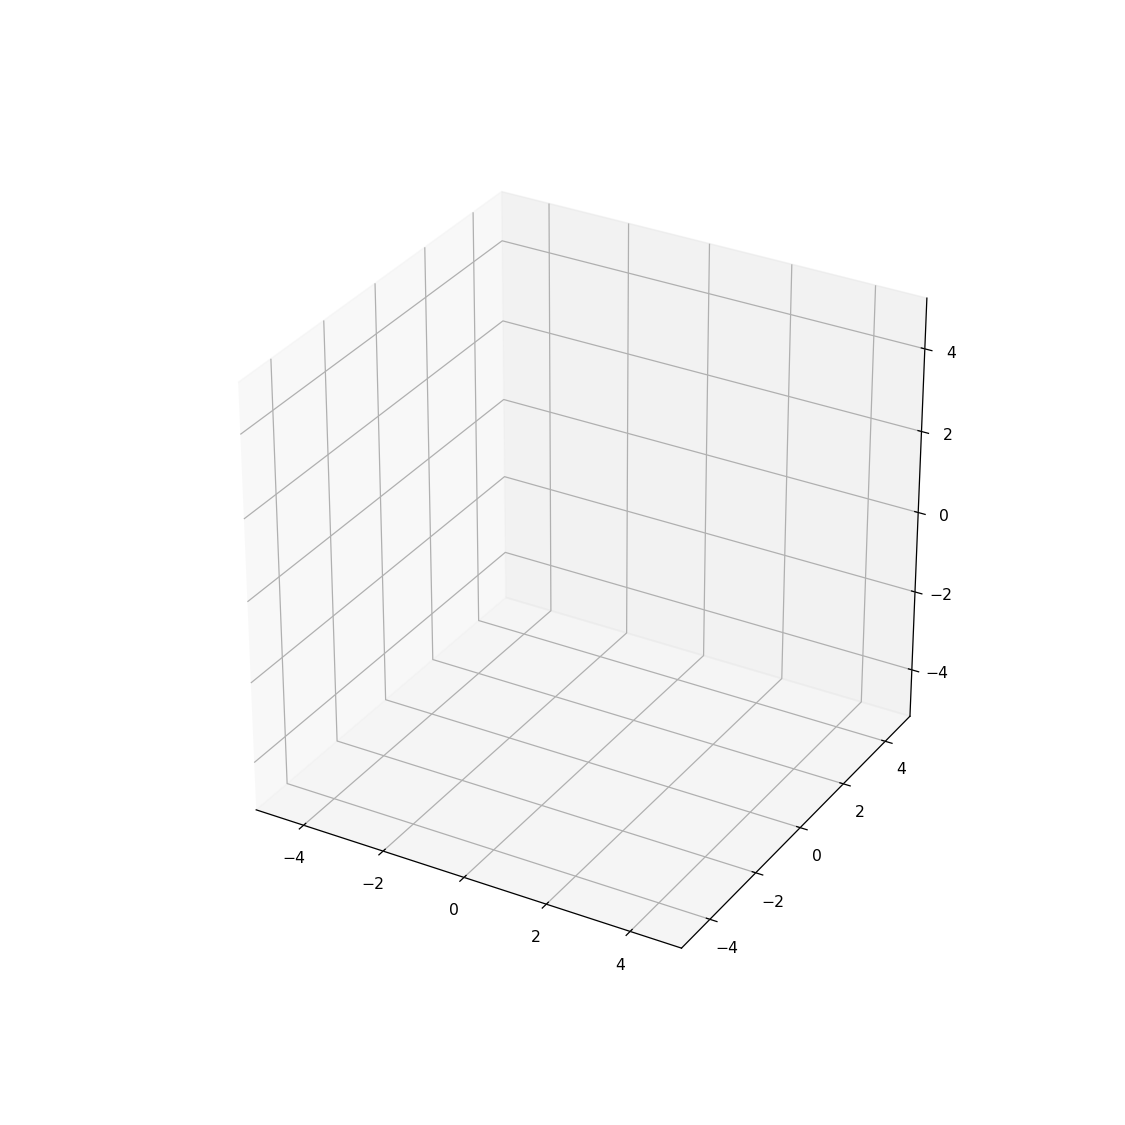

m = 1, vec_r = [-0.12041421  0.98567681 -0.09581089], vec_v = [ 2.6127969  -2.85331399 -0.63457446]
m = 1, vec_r = [0 0 0], vec_v = [0 0 0]
m = 0.001, vec_r = [-0.12041421  0.98567681 -0.09581089], vec_v = [ 2.6127969  -2.85331399 -0.63457446]


In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from numpy.linalg import norm 
import random as rd

# Магическая строка для корректного отображения анимации
%matplotlib notebook

G = 4 * np.pi**2 # в системе единиц "годы, массы Солнца, а.е."
dt = 0.001
crash_distance = 0.001
#total_
total_time = 1 #в годах
dim = 3 #размерность задачи
destroy_flag = 0 
vmax = 3 #максимальная скорость моделируемых тел
radius = 2 #максимальное расстояние от начала координат для моделируемых тел
size = 5 #radius * 3

fig = plt.figure(figsize=(10, 10))
# Добавляем на нее объект Axes3D для отображения графиков в 3D
ax = fig.add_subplot(111, projection='3d')
time = 0
        
class Star():
    def __init__(self, mass = rd.uniform(1, 10), vec_r = np.array([rd.uniform(-radius,radius) for i in range (dim)]), vec_v = np.array([rd.uniform(-vmax,vmax) for i in range (dim)])): #, dv=0):
        self.mass = mass
        self.vec_v = np.array(vec_v)
        self.vec_r = np.array(vec_r)
        #self.dv = dv #np.array(dv)
    
    def show(self):
        print(f'm = {self.mass}, vec_r = {self.vec_r}, vec_v = {self.vec_v}')

    def is_body(self, body):
        res = 1
        for i in range(dim):
            res = res & (self.vec_r[i] == body.vec_r[i]) & (self.vec_v[i] == body.vec_v[i]) 
            #print(self.vec_r[i], body.vec_r[i], self.vec_v[i], body.vec_r[i])
        res = (self.mass == body.mass) & res #& (self.dv ==  body.dv)
        #print(res)
        return res

    def destroy(self, body):
        if (self.mass / body.mass < 1e4):
            self.vec_r = (self.vec_r + body.vec_r)/2
            self.vec_v = (self.mass * self.vec_v + body.mass * body.vec_r) / (self.mass + body.mass)       
            self.mass = self.mass + body.mass

    def move_system(self, bodies, time):
        if ((norm(self.vec_v) > 0)or(norm(self.vec_r)>0)): #проверка того, перешли ли мы уже в СО звезды
            for body in bodies:
                body.vec_v = body.vec_v - self.vec_v # переход в СО звезды
                body.vec_r = body.vec_r - self.vec_r
            self.vec_v = self.vec_v * 0
            self.vec_r = self.vec_r * 0
            
        self_destroy_flag = 0
        destroy_flag = 0
        
        #найдем ускорение самой звезды 
        self_dv = self.vec_v * 0  #для соблюдения размерности
        for obj in bodies:
            if (norm(obj.vec_r-self.vec_r) > crash_distance):
                if (self.mass / obj.mass < 1e4):
                    self_dv = self_dv + G * obj.mass * obj.vec_r  / (norm(obj.vec_r)**3)
            else:
                self_destroy_flag = 1
                destroyed_obj = obj
                break

        if (self_destroy_flag == 1):
            #new_list_of_bodies = [elem for elem in bodies if (not elem.is_body(destroyed_obj))] 
            self.destroy(destroyed_obj)
            #print(f'1 body crashed on a star, modeling {len(new_list_of_bodies)} bodies')
            #self.gravitate(new_list_of_bodies, time)
            return [destroyed_obj]
        
            #Найдем вклад каждого из тел в ускорение
        for body in bodies: 
            #delta_v = body.vec_v * 0 #для того, чтобы сделать delta_v такой же размерности
            delta_v = - G * self.mass * (body.vec_r) / (norm(body.vec_r))**3
            for obj in bodies:
                if (norm(obj.vec_r-body.vec_r) > crash_distance):
                    delta_v = delta_v + G * obj.mass * (obj.vec_r - body.vec_r) / (norm(obj.vec_r - body.vec_r))**3      
                elif (not obj.is_body(body)):
                    '''new_list_of_bodies = [elem for elem in bodies if ((not elem.is_body(obj)) or (not elem.is_body(body)))] 
                        #destroy() реализованный через моделирование тех же тел, только без столкнувшихся
                        """new_body = CosmicBody(obj.mass+body.mass, (obj.mass*obj.vec_v + body.mass*body.vec_v), (obj.vec_r+body.vec_r)/2, 0)
                        #Добавим новое тело, получившееся в результате абсолютно неупрогого столкновения
                        new_list_of_bodies.append(new_body)"""
                    self.gravitate(new_list_of_bodies) '''
                    destroy_flag = 1
                    destroyed_obj = obj
                    break #выход из цикла obj
                
            if (destroy_flag == 1):
                destroy_flag = 0
                '''new_list_of_bodies = [elem for elem in bodies if ((not elem.is_body(destroyed_obj)) & (not elem.is_body(body)))] 
                #destroy() реализованный через моделирование тех же тел, только без столкнувшихся
                """new_body = CosmicBody(obj.mass+body.mass, (obj.mass*obj.vec_v + body.mass*body.vec_v), (obj.vec_r+body.vec_r)/2, 0)
                    #Добавим новое тело, получившееся в результате абсолютно неупрогого столкновения
                    new_list_of_bodies.append(new_body)"""'''
                #print(f'2 bodies crashed, modeling {len(new_list_of_bodies)} bodies')
                #self.gravitate(new_list_of_bodies, time) #запуск моделирования с новым списком тел. Получается рекурсия, но не предполагается моделирование для > 50 тел, поэтому исключается возможность ошибки
                return [body, destroyed_obj] #выход из цикла для моделирования с прошлым списком тел 
            
            body.move(dt/2)            #так как при равноускоренном движении dr = dt/2*(v1+v2)                
            body.accelerate(delta_v - self_dv) # так как a_rel = a_abs - a_trans (a_trans = - a_star)
            body.move(dt/2)
            body.trajectory.append(body.vec_r)

        #result = [body.vec_r for body in bodies]
        return []

    def gravitate(self, bodies, time): # юпитер ругается на вызов до инициализации, если использовать глобальное время, поэтому придется его передавать
        if (len(bodies) == 0):
            time = total_time
        # Задаем границы
        ax.axes.set_xlim3d(-size, size)
        ax.axes.set_ylim3d(-size, size)
        ax.axes.set_zlim3d(-size, size)    

        # Отображаем пустую фигуру
        fig.show()
        fig.canvas.draw()

        while ((time < total_time) and (max_r(bodies) < 50) ): 
            destroyed_bodies = self.move_system(bodies, time) 
            if (len(destroyed_bodies) != 0):
                new_list_of_bodies = [elem for elem in bodies if (not (elem in destroyed_bodies))] #.is_body(destroyed_obj)) & (not elem.is_body(body)))]
                self.gravitate(new_list_of_bodies, time)
                return
            
            #анимация для bodies
            #angle = 60 + 60 * time / total_time

            # Удаляем графики, отображенные на предыдущем шаге
            ax.clear()

            # Задаем границы, потому что они скидываются на дефолтные
            ax.axes.set_xlim3d(-size, size)
            ax.axes.set_ylim3d(-size, size)
            ax.axes.set_zlim3d(-size, size)
            
            # Отображаем движение точек
            ax.scatter([0],[0],[0], label = f'time = {round(time, 3)}')

            for body in bodies: 
                traj = np.array(body.trajectory).T
                ax.plot(traj[0], traj[1], traj[2])
                ax.scatter(body.vec_r[0], body.vec_r[1], body.vec_r[2])
            # Изменяем угол отображения графика
            #ax.view_init(30 - angle * 0.2, angle)
            ax.legend()
            # Перерисовываем фигуру
            fig.canvas.draw()

            time += dt


class CosmicBody(Star): # idk, на кой тут наследование, но кажется логичным, что СosmicBody можно gravitate друг относительно друга, но если у нас конкретная звезда, она можен не обладать доп методами

    def __init__(self, mass = rd.uniform(0.1, 1), vec_r = np.array([rd.uniform(-radius,radius) for i in range (dim)]), vec_v = np.array([rd.uniform(-vmax, vmax) for i in range (dim)])): #, dv=0):
        self.trajectory = []
        super().__init__(mass, vec_r, vec_v)#, dv)
    
    '''def change_dv(self, changed_dv):
        self.dv = changed_dv'''

    def accelerate(self, Dv): 
        self.vec_v = self.vec_v + Dv * dt
        #self.dv = Dv #на самом деле оно нам и не нужно, если есть delta_v в цикле

    def move(self, time):
        self.vec_r = self.vec_r + time * self.vec_v

def max_r(bodies):
    r = 0
    for body in bodies:
        if (norm(body.vec_r) > r):
            r = norm(body.vec_r)
    return r

def test_functions():
    a = CosmicBody(1, )
    c = CosmicBody(1e-3, )
    b = Star(1, [0,0,0], [0,0,0])
    a.show()
    b.show()
    c.show()
    b.gravitate([a, c], time)

def test_destr():
    star = Star(1, [0,0,0], [0,0,0])
    body1 = CosmicBody(6e-6, [1, -0.05, 0], [-1, 2, 0])
    body2 = CosmicBody(6e-6, [1, 0.05, 0], [-1, -2, 0])
    body3 = CosmicBody(6e-6, [-1, 0.1, 0], [1, -5, 0])
    star.gravitate([body1, body2, body3], time)
    
def test_earth():
    size = 1
    sun = Star(1, [0,0,0], [0,0,0])
    earth = CosmicBody(6e-6, [1,0,0], [0, 6.28318, 0], time)
    sun.gravitate([earth])

#test_earth() 
#test_destr()
test_functions()




